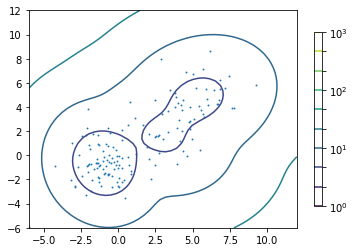

Mean:
 [[-0.97675717 -0.65978187]
 [ 5.35474763  4.71166217]
 [ 2.95794243  1.5172694 ]]
Amplitude:
 [ 0.56497181  0.26025477  0.17477342]
Covariance matrix:
 [[[ 1.21681206 -0.11996906]
  [-0.11996906  1.97577318]]

 [[ 2.3640313   0.45069033]
  [ 0.45069033  2.33636882]]

 [[ 2.05537151 -0.26590085]
  [-0.26590085  2.08519189]]]
0.45572532890203377


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture
import timeit
start = timeit.default_timer()
data=np.loadtxt('clusters.txt',delimiter=',')
# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=3, covariance_type='full', max_iter = 100000, init_params = 'kmeans')
clf.fit(data)

x = np.linspace(-6., 12.)
y = np.linspace(-6., 12.)

X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(data[:, 0], data[:, 1], .8)

plt.show()
print("Mean:\n", clf.means_)
print("Amplitude:\n", clf.weights_)
print("Covariance matrix:\n", clf.covariances_)

print(timeit.default_timer() - start)